In [1]:
#Import Necessary Libaries for script
from pytz import timezone
import matplotlib.pyplot as plt
import pandas as pd
import time
import datetime as dt
from datetime import datetime
import MetaTrader5 as mt5
import pytz
import talib
import numpy

In [2]:
#Input Currency Pair to test Strentgth
Symbol = input()

 EURUSD


In [3]:
#Access MT5 package and Initialize the system (Generalized to be inluded in all scripts)
if not mt5.initialize():
        print("initialize() failed, error code =",mt5.last_error())
        quit()
mt5.login()
#Set parameters for time
timezone = pytz.timezone("UTC")
now = datetime.now(timezone)
start = datetime.now(timezone) - dt.timedelta(days=1)
utc_from = datetime(start.year, start.month, start.day)
currency_strength = pd.DataFrame()
rsi_df=pd.DataFrame()
utc_to = datetime(now.year, now.month, now.day, now.hour, now.minute, now.second)
#Pull price data from MT5
'''rates = mt5.copy_rates_range(Symbol, mt5.TIMEFRAME_M1, utc_from, utc_to)
#Format Data in Pandas DataFrames to be manipulated
htf = pd.DataFrame(rates)
htf['time']=pd.to_datetime(htf['time'], unit='s')'''

#Lookback function and timer
start=time.time()
lookback = 15

In [12]:
currency_pair =["EURUSD","EURGBP","EURJPY","EURAUD","EURNZD",
"EURCHF","EURCAD","GBPUSD", "GBPJPY","GBPAUD","GBPNZD","GBPCAD",
"GBPCHF","USDCAD", "USDJPY","CHFJPY","CADJPY","NZDJPY","AUDJPY",
"AUDNZD","AUDCAD", "NZDUSD","NZDCAD","NZDCHF","AUDCHF","CADCHF",
"AUDUSD","USDCHF"]

for pair in currency_pair:
    ohlc = mt5.copy_rates_from(pair,mt5.TIMEFRAME_M15, datetime.now(), lookback)
    df = pd.DataFrame(ohlc)
    rsi_df[pair]=talib.RSI(df.close,7)

In [5]:
#Calculate the Strength of each individual currency
rsi_df.tail()
strength=pd.DataFrame()
strength["USD"]=1/7*((100-rsi_df.EURUSD)+(100-rsi_df.GBPUSD)+\
    rsi_df.USDCAD+rsi_df.USDJPY+(100-rsi_df.NZDUSD)+\
        (100-rsi_df.AUDUSD)+rsi_df.USDCHF)
strength["EUR"]=1/7*(rsi_df.EURUSD+rsi_df.EURGBP+\
    rsi_df.EURJPY+rsi_df.EURAUD+rsi_df.EURNZD+rsi_df.EURCHF+\
        rsi_df.EURCAD)
strength["GBP"]=1/7*(rsi_df.GBPUSD+rsi_df.GBPJPY+\
    rsi_df.GBPAUD+rsi_df.GBPNZD+rsi_df.GBPCAD+rsi_df.GBPCHF+\
        (100-rsi_df.EURGBP))
strength["CHF"]=1/7*((100-rsi_df.EURCHF)+(100-rsi_df.GBPCHF)+\
    (100-rsi_df.NZDCHF)+(100-rsi_df.AUDCHF)+(100-rsi_df.CADCHF)+\
        rsi_df.CHFJPY+(100-rsi_df.USDCHF))
strength["JPY"]=1/7*((100-rsi_df.EURJPY)+(100-rsi_df.GBPJPY)+\
    (100-rsi_df.USDJPY)+(100-rsi_df.CHFJPY)+(100-rsi_df.CADJPY)+\
        (100-rsi_df.NZDJPY)+(100-rsi_df.AUDJPY))
strength["AUD"]=1/7*((100-rsi_df.EURAUD)+(100-rsi_df.GBPAUD)+\
    (100-rsi_df.AUDJPY)+rsi_df.AUDNZD+rsi_df.AUDCAD+
    rsi_df.AUDCHF+rsi_df.AUDUSD)
strength["CAD"]=1/7*((100-rsi_df.EURCAD)+(100-rsi_df.GBPCAD)+\
    (100-rsi_df.USDCAD)+rsi_df.CADJPY+(100-rsi_df.AUDCAD)+\
        (100-rsi_df.NZDCAD)+rsi_df.CADCHF)
strength["NZD"]=1/7*((100-rsi_df.EURNZD)+(100-rsi_df.GBPNZD)+\
    rsi_df.NZDJPY+rsi_df.NZDUSD+rsi_df.NZDCAD+rsi_df.NZDCHF+\
        (100-rsi_df.AUDNZD))

In [6]:
#strength.dropna()

In [7]:
Major_Pairs = ['EURUSD','USDJPY','USDCHF','USDCAD','GBPUSD','AUDUSD','NZDUSD']

In [8]:
if strength['EUR'].loc[strength.index[-1]] > strength['USD'].loc[strength.index[-1]]:
    EURUSD = 'Bullish'
else:
    EURUSD = 'Bearish'
if strength['USD'].loc[strength.index[-1]] > strength['JPY'].loc[strength.index[-1]]:
    USDJPY = 'Bullish'
else:
    USDJPY = 'Bearish'
if strength['USD'].loc[strength.index[-1]] > strength['CHF'].loc[strength.index[-1]]:
    USDCHF = 'Bullish'
else:
    USDCHF = 'Bearish'
if strength['USD'].loc[strength.index[-1]] > strength['CAD'].loc[strength.index[-1]]:
    USDCAD = 'Bullish'
else:
    USDCAD = 'Bearish'
if strength['GBP'].loc[strength.index[-1]] > strength['USD'].loc[strength.index[-1]]:
    GBPUSD = 'Bullish'
else:
    GBPUSD = 'Bearish'
if strength['AUD'].loc[strength.index[-1]] > strength['USD'].loc[strength.index[-1]]:
    AUDUSD = 'Bullish'
else:
    AUDUSD = 'Bearish'
if strength['NZD'].loc[strength.index[-1]] > strength['USD'].loc[strength.index[-1]]:
    NZDUSD = 'Bullish'
else:
    NZDUSD = 'Bearish'

In [9]:
MS = eval(Symbol)
print(Symbol,'is',MS)

EURUSD is Bearish


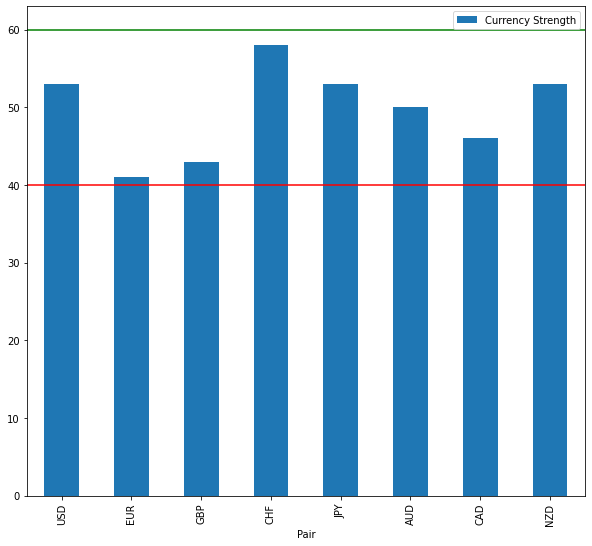

In [10]:
str =pd.DataFrame()
str['Pair'] = ["USD","EUR","GBP","CHF","JPY","AUD","CAD","NZD"]
str['Currency Strength'] = [int(strength['USD'].loc[strength.index[-1]]),int(strength['EUR'].loc[strength.index[-1]]),int(strength['GBP'].loc[strength.index[-1]]),int(strength['CHF'].loc[strength.index[-1]]),int(strength['JPY'].loc[strength.index[-1]]),int(strength['AUD'].loc[strength.index[-1]]),int(strength['CAD'].loc[strength.index[-1]]),int(strength['NZD'].loc[strength.index[-1]])]
str.plot(x="Pair", y="Currency Strength", kind="bar", figsize=(10, 9))
plt.hlines(40,-1,8,color='red')
plt.hlines(60,-1,8,color='green')

In [11]:
time_frame=[mt5.TIMEFRAME_M1,mt5.TIMEFRAME_M5,mt5.TIMEFRAME_M15]
tifr=pd.DataFrame()
tifr

""
